In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [2]:
hday= pd.read_csv('Holiday_Package.csv')

In [3]:
hday.head(20)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [4]:
hday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
hday.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [6]:
dups= hday.duplicated()
dups.sum()

0

In [7]:
hday.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [8]:
def univariateanalysis (column,bins):
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    print (hday[column].describe(), end='')
       
    plt.figure()
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    sns.distplot(hday[column],kde= True, color = 'r');
    plt.show()
    
    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= hday[column])
    plt.show()

In [9]:
def analysisforcat (column,bins):
    print ('Unique Values of'+ column)
    print ('-------------------------------------------------------------------------------------')
    print ('Total no. of unique values: ', (hday[column].nunique()))
    print (hday[column].value_counts(normalize= True, sort= False, ascending=True),end='')
    
    plt.figure()
    print ('Countplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.countplot(x=hday[column]);
    plt.show()

In [10]:
numcol= hday[['Salary','age','educ','no_young_children','no_older_children',]]
numcol

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2
...,...,...,...,...,...
867,40030,24,4,2,1
868,32137,48,8,0,0
869,25178,24,6,2,0
870,55958,41,10,0,1


Description of Salary
--------------------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64Description of Salary
--------------------------------------------------------------------------------------


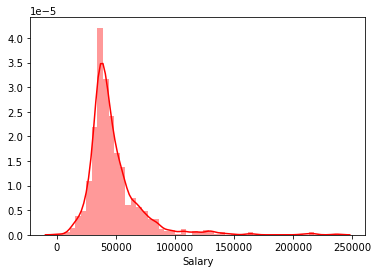

Boxplot of Salary
--------------------------------------------------------------------------------------


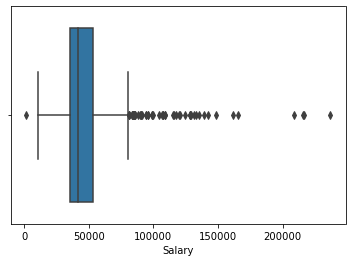

Description of age
--------------------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64Description of age
--------------------------------------------------------------------------------------


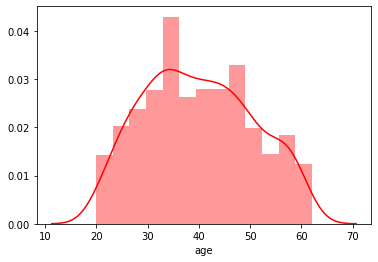

Boxplot of age
--------------------------------------------------------------------------------------


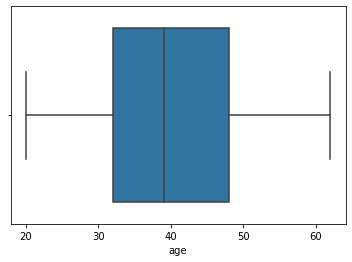

Description of educ
--------------------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64Description of educ
--------------------------------------------------------------------------------------


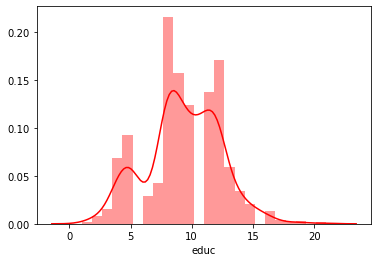

Boxplot of educ
--------------------------------------------------------------------------------------


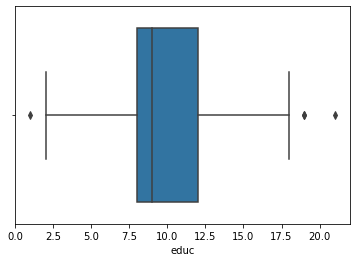

Description of no_young_children
--------------------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64Description of no_young_children
--------------------------------------------------------------------------------------


C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


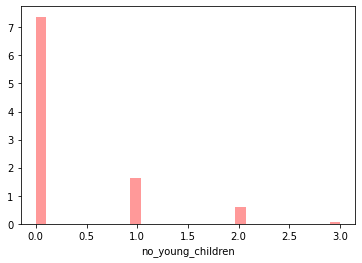

Boxplot of no_young_children
--------------------------------------------------------------------------------------


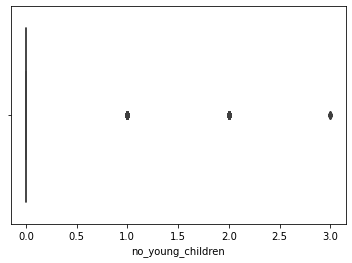

Description of no_older_children
--------------------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64Description of no_older_children
--------------------------------------------------------------------------------------


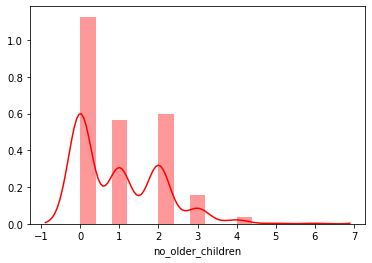

Boxplot of no_older_children
--------------------------------------------------------------------------------------


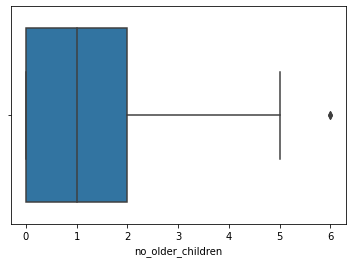

In [11]:
for x in numcol:
    univariateanalysis(x,20)

In [12]:
hday.Holliday_Package.value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [13]:
for feature in hday.columns: 
    if hday[feature].dtype == 'object': 
        print(feature)
        print(hday[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




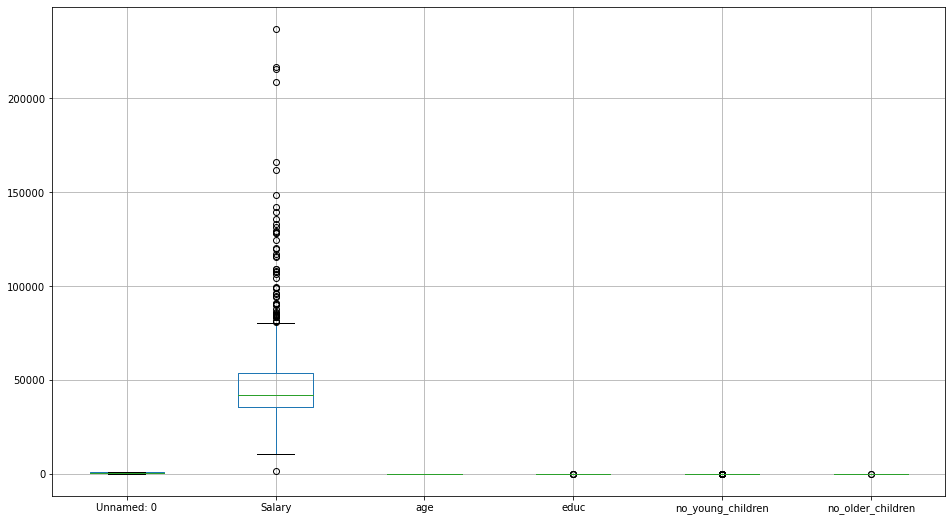

In [14]:
# checking for outliers
plt.figure(figsize=(16,9))
hday.boxplot()

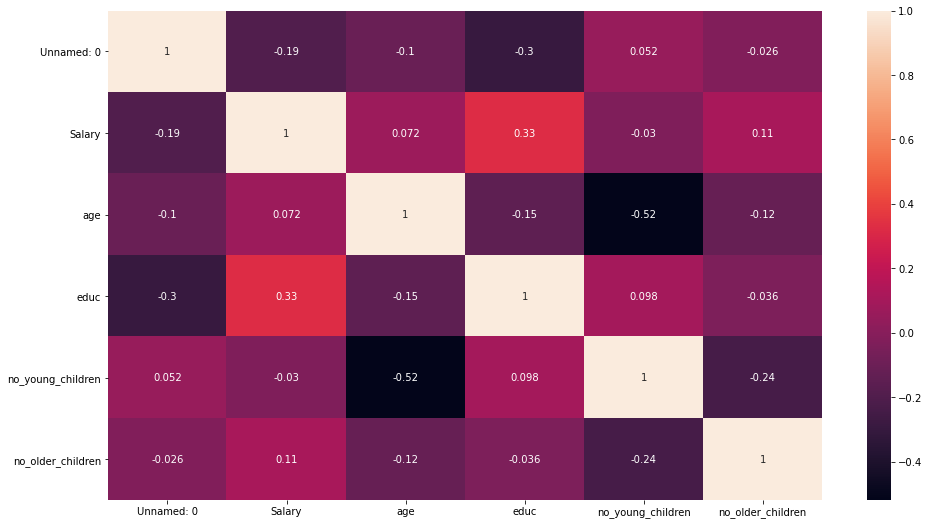

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(hday.corr(), annot=True)
plt.show()

C:\Users\sanjay singh\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


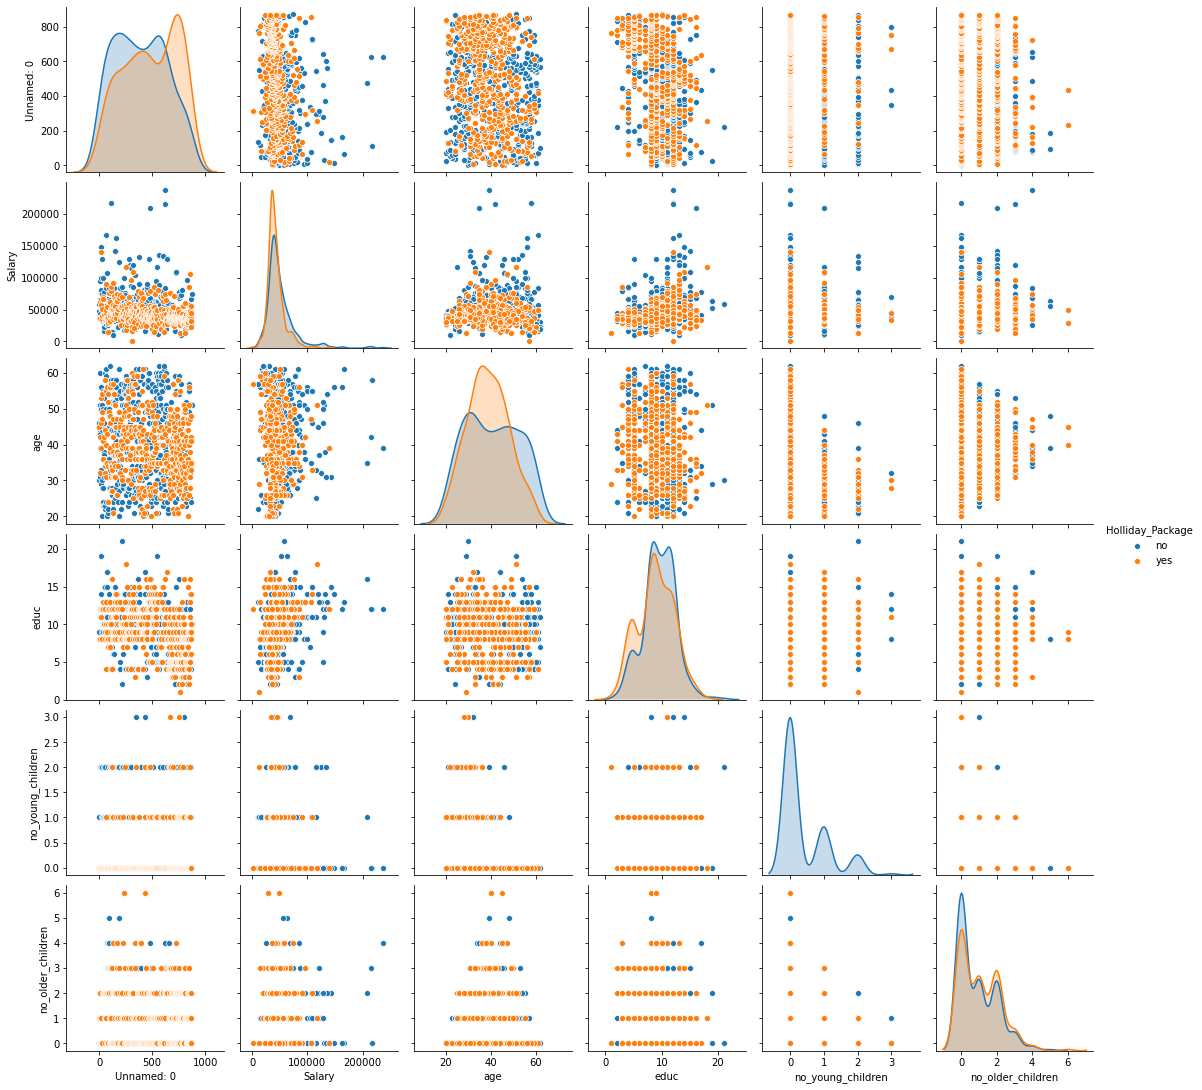

In [16]:
sns.pairplot(hday , hue='Holliday_Package' , diag_kind = 'kde')

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
for column in hday.columns:
    if hday[column].dtype != 'object': 
        lr,ur=remove_outlier(hday[column])
        hday[column]=np.where(hday[column]>ur,ur,hday[column])
        hday[column]=np.where(hday[column]<lr,lr,hday[column])

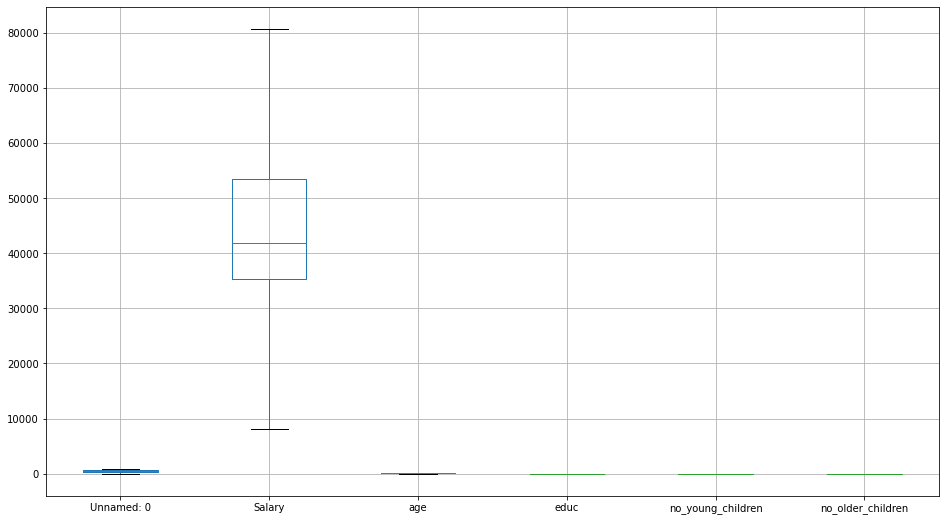

In [19]:
plt.figure(figsize=(16,9))
hday.boxplot()

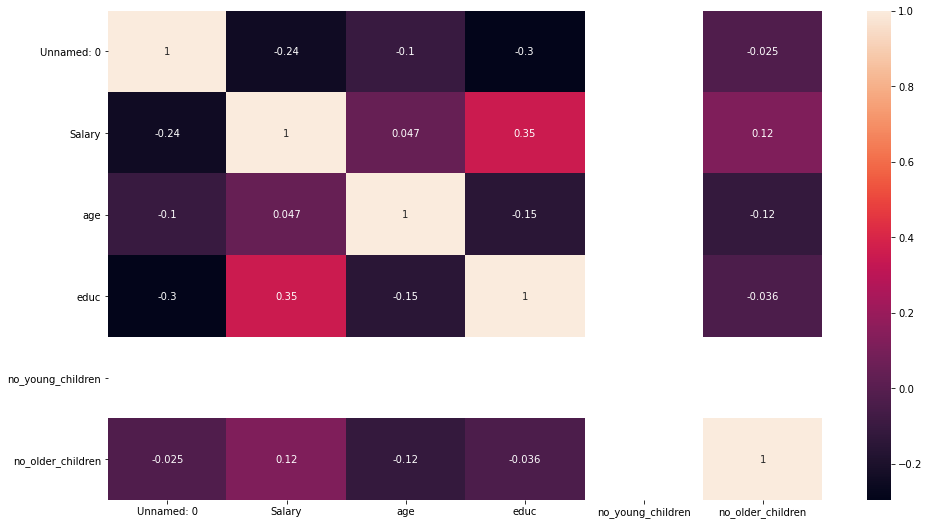

In [20]:
plt.figure(figsize=(16,9))
sns.heatmap(hday.corr(), annot=True)
plt.show()

In [21]:
hday=hday.drop('Unnamed: 0', axis=1)
hday=hday.drop('no_young_children', axis=1)

In [22]:
for feature in hday.columns: 
    if hday[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(hday[feature].unique()))
        print(pd.Categorical(hday[feature].unique()).codes)
        hday[feature] = pd.Categorical(hday[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [23]:
# x and y 

x = hday.drop('Holliday_Package', axis=1)

y= hday['Holliday_Package']

In [24]:
# train test split

x_train, x_test, train_labels, test_labels = train_test_split(x,y, test_size=0.30, random_state=1)

In [25]:
# fit the model to logistic regression

model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(x_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [26]:
xtrain_predict = model.predict(x_train)
xtest_predict = model.predict(x_test)

In [27]:
xtest_predict_prob=model.predict_proba(x_test)
pd.DataFrame(xtest_predict_prob).head()

,0,1
0,0.696738,0.303262
1,0.332220,0.667780
2,0.618874,0.381126
3,0.687097,0.312903
4,0.355072,0.644928


In [28]:
model.score(x_train, train_labels)

0.6409836065573771

AUC: 0.667


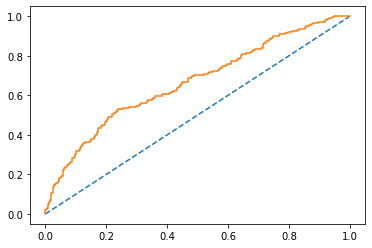

In [29]:
# predict probabilities
probs = model.predict_proba(x_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [30]:
optimal_idx = np.argmax(train_tpr - train_fpr)
optimal_threshold = train_thresholds[optimal_idx]
optimal_threshold

0.46957296135102605

In [31]:
train_labels_pred=[]
for i in range(0,len(probs)):
    if np.array(probs)[i]>0.47:
        a=1
    else:
        a=0
    train_labels_pred.append(a)

In [32]:
confusion_matrix(train_labels, train_labels_pred)

array([[248,  78],
       [134, 150]], dtype=int64)

In [33]:
print(classification_report(train_labels, train_labels_pred))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       326
           1       0.66      0.53      0.59       284

    accuracy                           0.65       610
   macro avg       0.65      0.64      0.64       610
weighted avg       0.65      0.65      0.65       610



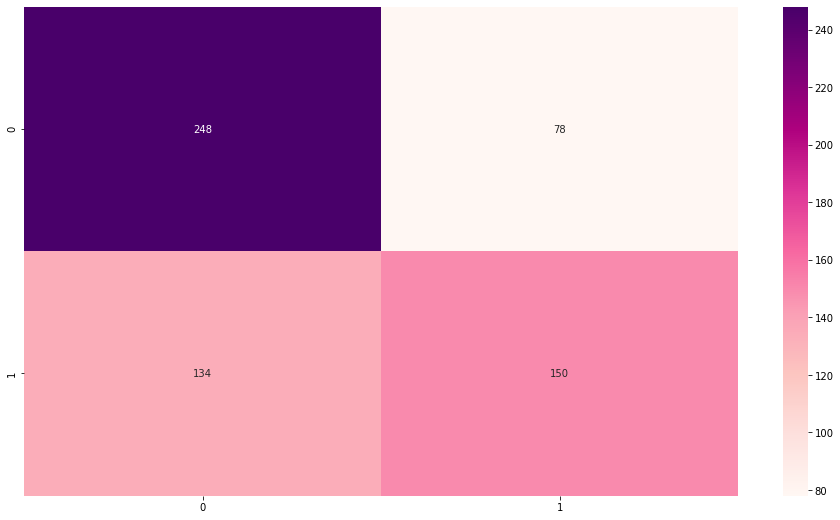

Training Data


In [34]:
plt.figure(figsize=(16,9))
sns.heatmap((confusion_matrix(train_labels,train_labels_pred)),annot=True,fmt='.5g',cmap='RdPu',)
plt.show()
print ("Training Data")



AUC: 0.667


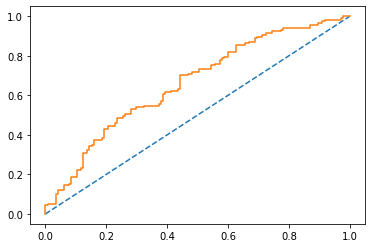

In [35]:
probs = model.predict_proba(x_test)
probs = probs[:, 1]
test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [36]:
test_labels_pred=[]
for i in range(0,len(probs)):
    if np.array(probs)[i]>0.47:
        a=1
    else:
        a=0
    test_labels_pred.append(a)

In [37]:
cnf_matrix=confusion_matrix(test_labels, test_labels_pred)
cnf_matrix

array([[103,  42],
       [ 55,  62]], dtype=int64)

In [38]:
print(classification_report(test_labels, test_labels_pred))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       145
           1       0.60      0.53      0.56       117

    accuracy                           0.63       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.63      0.63      0.63       262



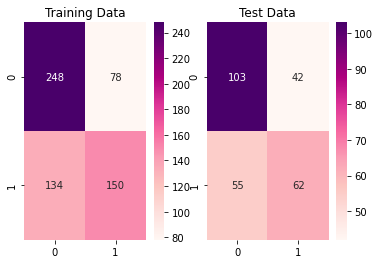

<Figure size 1080x648 with 0 Axes>

In [48]:
f,a =  plt.subplots(1,2,squeeze=False)
plt.figure(figsize=(15,9))

plot_0 = sns.heatmap((confusion_matrix(train_labels,train_labels_pred)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][0]);
a[0][0].set_title('Training Data')


plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels, test_labels_pred)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][1]);
a[0][1].set_title('Test Data');

plt.show()


In [49]:
lda= pd.read_csv('Holiday_Package.csv')

In [50]:
lda.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [51]:
for feature in lda.columns: 
    if lda[feature].dtype == 'object': 
        print(feature)
        print(lda[feature].value_counts())
        print(lda[feature].value_counts(normalize=True))
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64
no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64


foreign
no     656
yes    216
Name: foreign, dtype: int64
no     0.752294
yes    0.247706
Name: foreign, dtype: float64




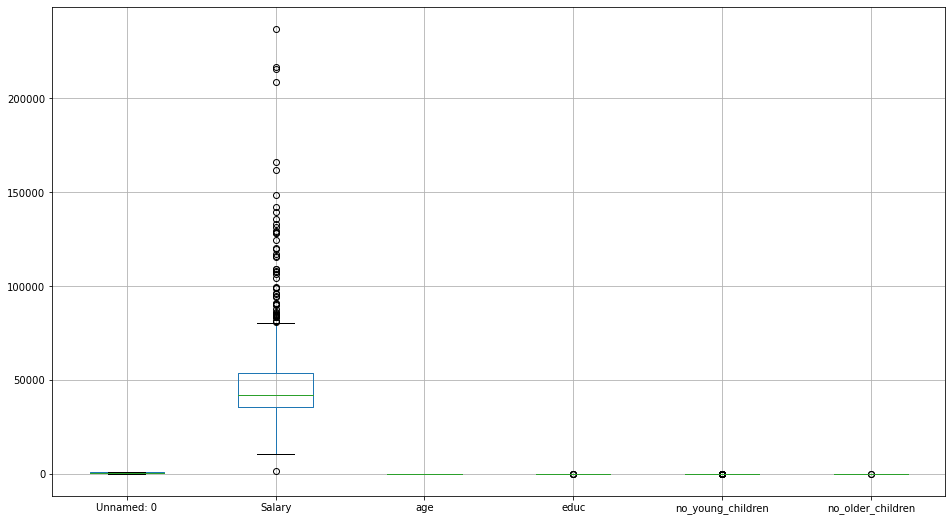

In [52]:
# checking for outliers
plt.figure(figsize=(16,9))
lda.boxplot()

In [53]:
from pylab import rcParams

In [54]:
rcParams['figure.figsize'] = 16,9

In [55]:
lda.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [56]:
lda=lda.drop(['Unnamed: 0'], axis=1)
lda=lda.drop(['no_young_children'], axis=1)

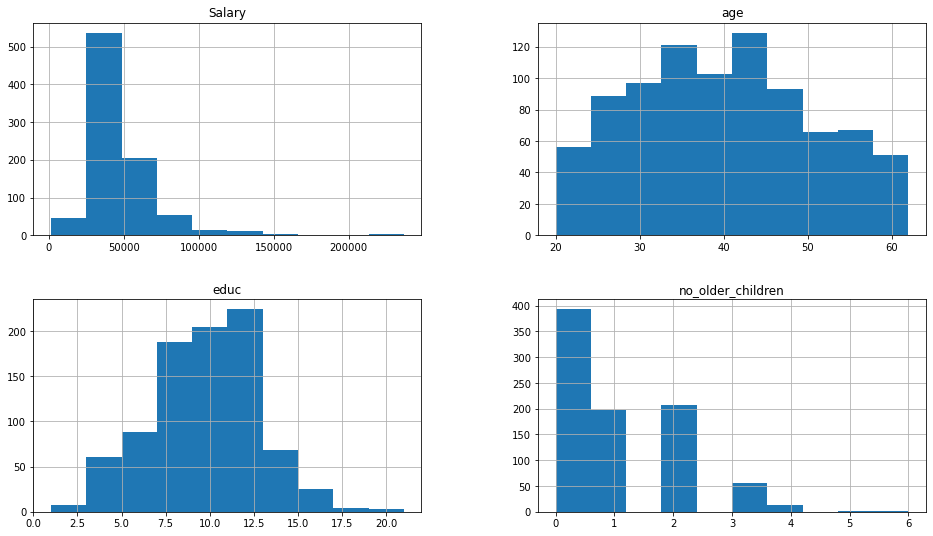

In [57]:
lda[['Salary','age','educ','no_older_children','foreign']].hist();

In [58]:
for column in lda.columns:
    if lda[column].dtype != 'object': 
        lr,ur=remove_outlier(lda[column])
        lda[column]=np.where(lda[column]>ur,ur,lda[column])
        lda[column]=np.where(lda[column]<lr,lr,lda[column])

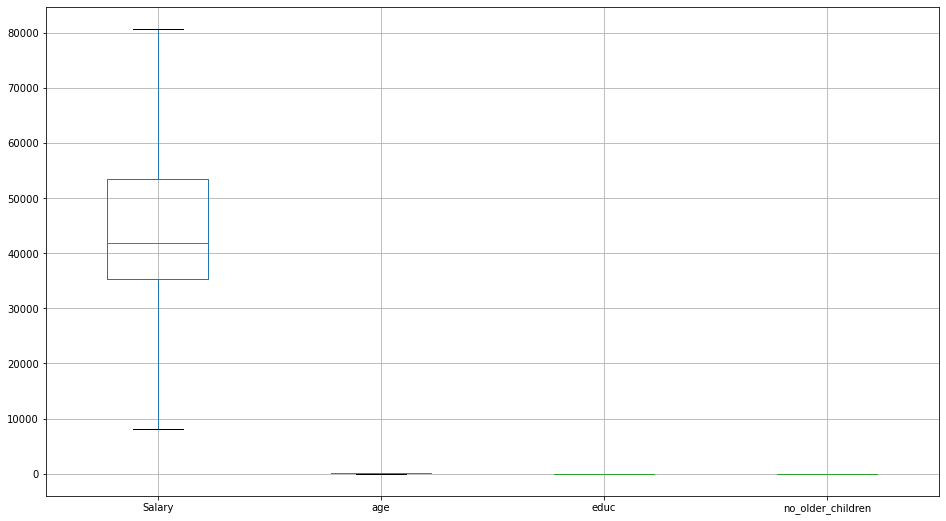

In [59]:
plt.figure(figsize=(16,9))
lda.boxplot()

In [60]:
for feature in lda.columns: 
    if lda[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(lda[feature].unique()))
        print(pd.Categorical(lda[feature].unique()).codes)
        lda[feature] = pd.Categorical(lda[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [61]:
for feature in lda.columns: 
        print(feature)
        print(lda[feature].value_counts())
        print('\n')

Holliday_Package
0    471
1    401
Name: Holliday_Package, dtype: int64


Salary
80687.75    56
46195.00     2
32197.00     2
40270.00     2
39460.00     2
            ..
34096.00     1
54486.00     1
35646.00     1
40030.00     1
52736.00     1
Name: Salary, Length: 809, dtype: int64


age
44.0    35
34.0    32
31.0    32
35.0    31
33.0    30
28.0    29
40.0    29
36.0    28
38.0    28
32.0    27
41.0    26
47.0    26
39.0    25
42.0    24
46.0    24
26.0    24
45.0    23
49.0    23
51.0    22
50.0    21
37.0    21
43.0    21
48.0    20
27.0    19
29.0    19
30.0    19
57.0    18
56.0    18
25.0    17
55.0    17
24.0    16
58.0    16
54.0    14
59.0    14
52.0    13
21.0    12
23.0    11
53.0    10
60.0    10
22.0     9
20.0     8
61.0     8
62.0     3
Name: age, dtype: int64


educ
8.0     157
12.0    124
9.0     114
11.0    100
10.0     90
5.0      67
4.0      50
13.0     43
7.0      31
14.0     25
6.0      21
15.0     15
3.0      11
16.0     10
2.0       7
18.0      4
17.0      3


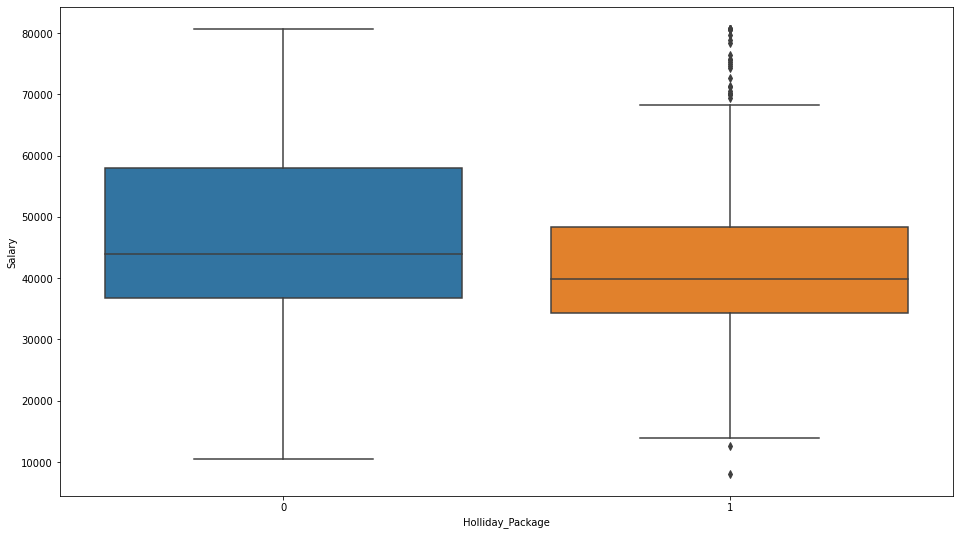

In [62]:
# Comparision with the Target variable

sns.boxplot(lda['Holliday_Package'],lda['Salary']);

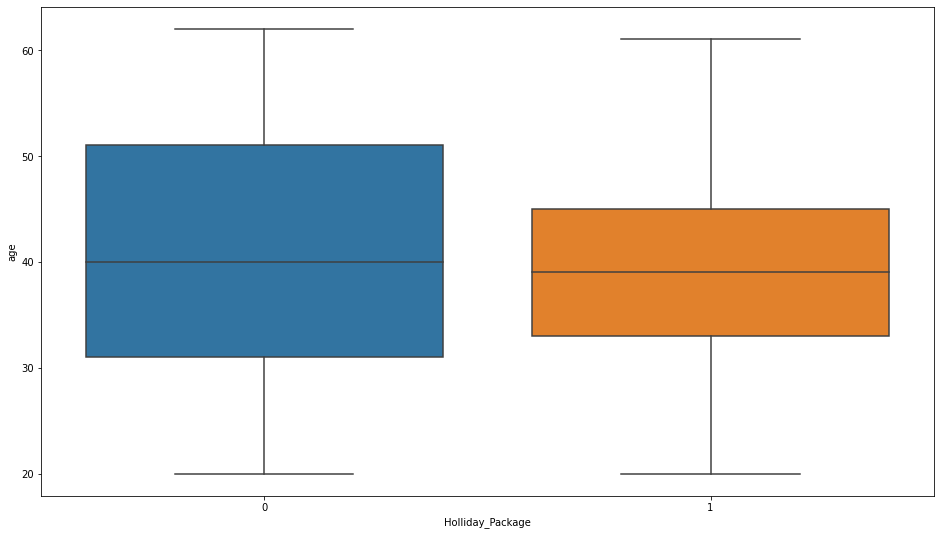

In [63]:
sns.boxplot(lda['Holliday_Package'],lda['age']);

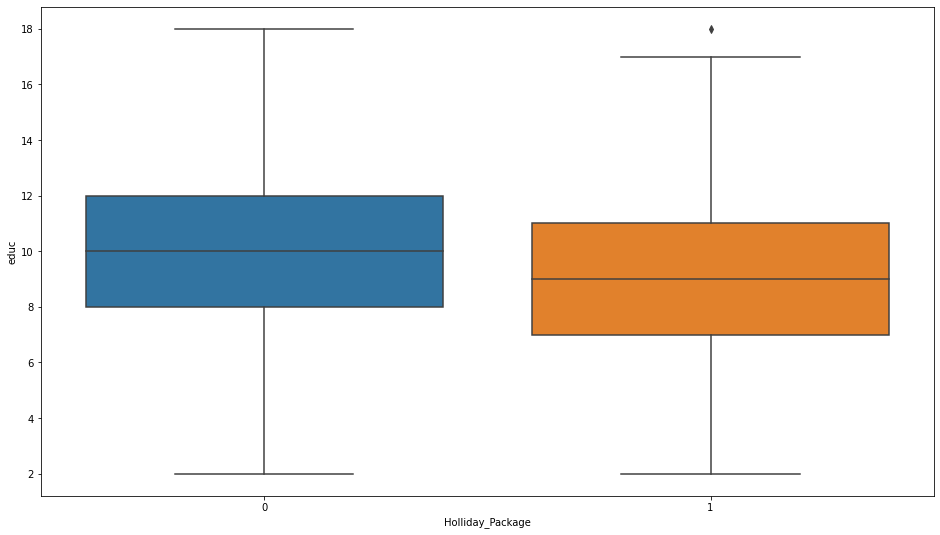

In [64]:
sns.boxplot(lda['Holliday_Package'],lda['educ']);

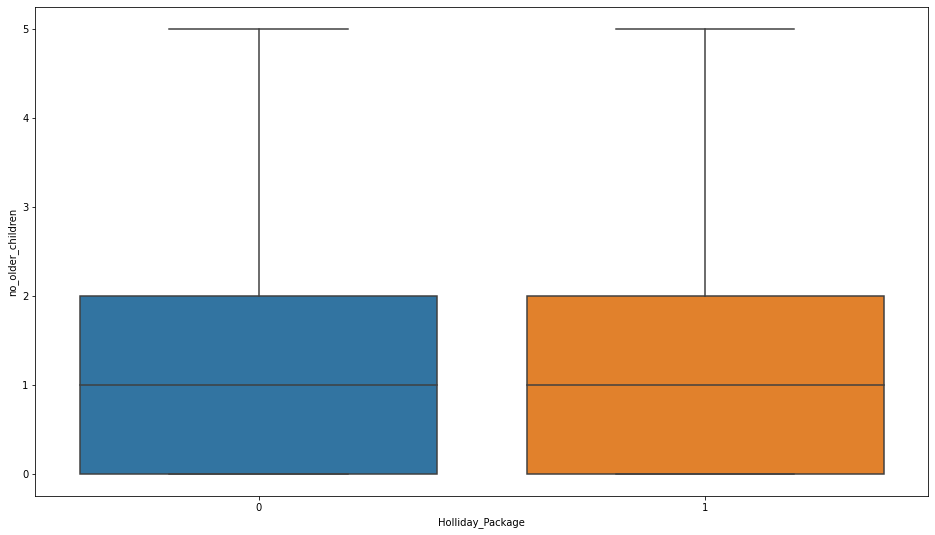

In [65]:
sns.boxplot(lda['Holliday_Package'],lda['no_older_children']);

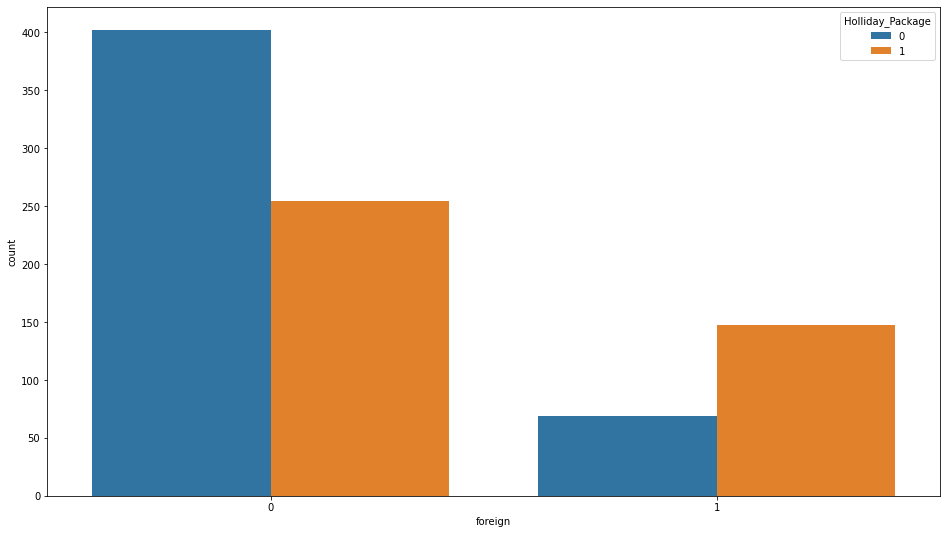

In [66]:
sns.countplot(lda['foreign'], hue= lda['Holliday_Package']);

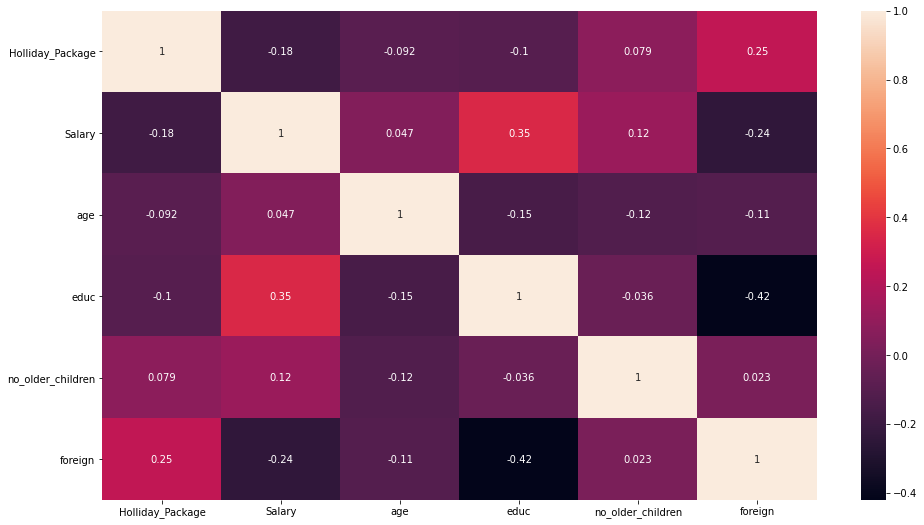

In [67]:
plt.figure(figsize=(16,9))
sns.heatmap(hday.corr(), annot=True)
plt.show()

In [68]:
x=lda.drop('Holliday_Package', axis=1)
y= lda['Holliday_Package']

In [69]:
x_train, x_test, train_labels, test_labels=train_test_split(x,y, test_size=0.30, random_state=1)

In [70]:
print('Number of rows and columns of the training set for the independent variables:',x_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',train_labels.shape)
print('Number of rows and columns of the test set for the independent variables:',x_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',test_labels.shape)

Number of rows and columns of the training set for the independent variables: (610, 5)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 5)
Number of rows and columns of the test set for the dependent variable: (262,)


In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
model=LDA.fit(x_train,train_labels)

In [72]:
pred_class_train = model.predict(x_train)

In [73]:
pred_class_test = model.predict(x_test)

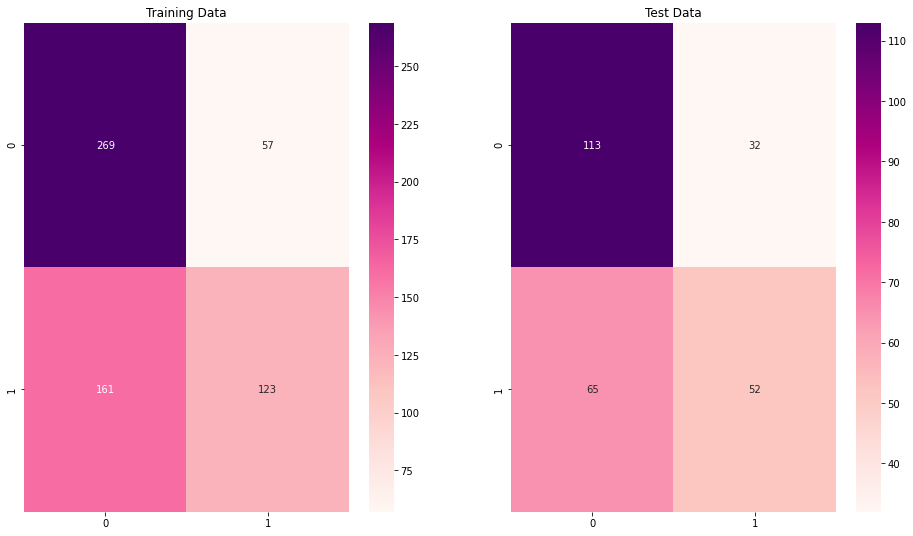

In [74]:
f,a =  plt.subplots(1,2,sharex=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(train_labels,pred_class_train)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels,pred_class_test)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [75]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



In [76]:
pred_prob_train = model.predict_proba(x_train)
pred_prob_test = model.predict_proba(x_test)


AUC for the Training Data: 0.667
AUC for the Test Data: 0.662


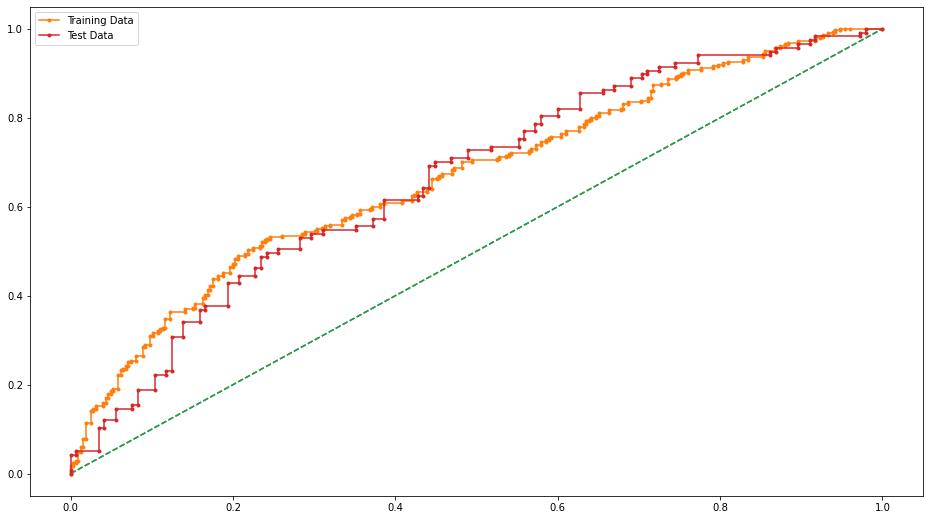

In [77]:
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [78]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(train_labels)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)#
    print(round(custom_prob, 1),round(metrics.precision_score(train_labels,custom_cutoff_data),4))

0.1 0.4656
0.2 0.4686
0.3 0.4935
0.4 0.5528
0.5 0.6833
0.6 0.7143
0.7 0.7586
0.8 1.0
0.9 0.0


C:\Users\sanjay singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.1:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

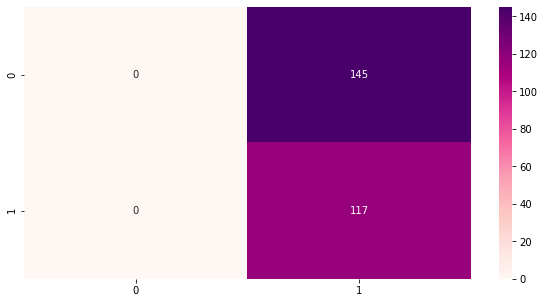

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap((metrics.confusion_matrix(test_labels,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='RdPu');

In [81]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(test_labels,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.45      1.00      0.62       117

    accuracy                           0.45       262
   macro avg       0.22      0.50      0.31       262
weighted avg       0.20      0.45      0.28       262
 



C:\Users\sanjay singh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
